<a href="https://colab.research.google.com/github/shantanu-workspace/Bootcamp-Git/blob/main/KM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0 


Clustered Data (first 10 rows):
    User ID  Gender  Age  EstimatedSalary  Purchased  Cluster
0  15624510       1   19            19000          0        0
1  15810944       1   35            20000          0        0
2  15668575       0   26            43000          0        0
3  15603246       0   27            57000          0        0
4  15804002       1   19            76000          0        0
5  15728773       1   27            58000          0        0
6  15598044       0   27            84000          0        0
7  15694829       0   32           150000          1        1
8  15600575       1   25            33000          0        0
9 

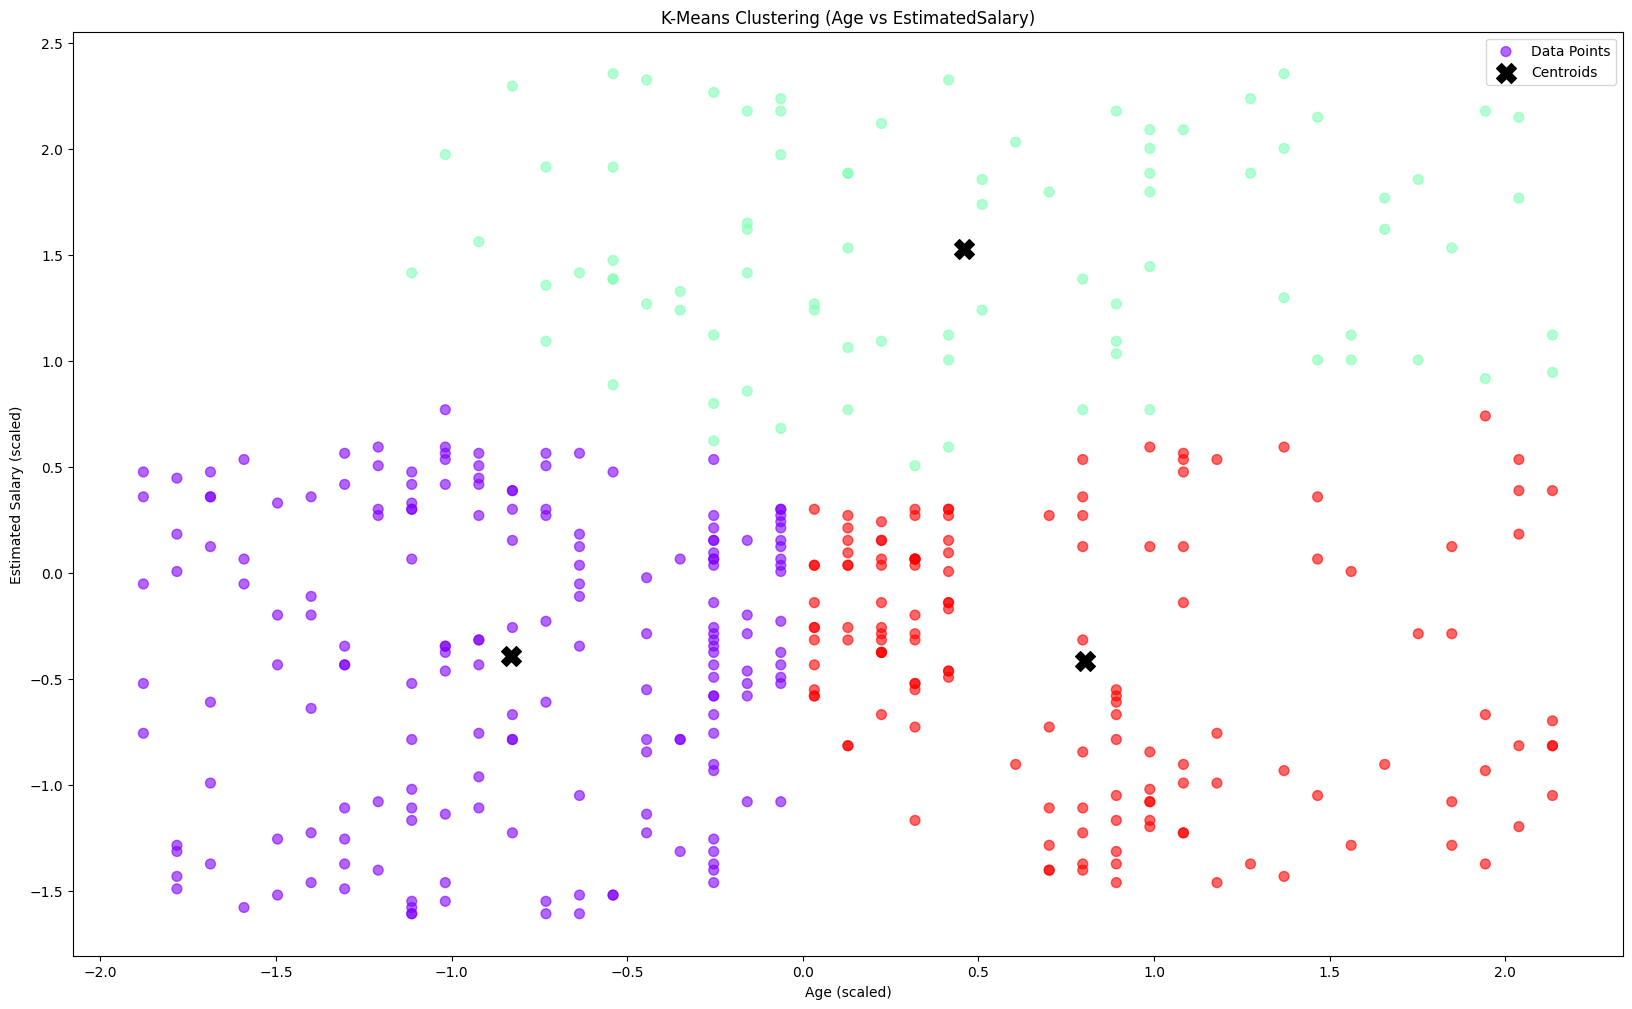


Cluster Centers (scaled):
[[-0.83200206 -0.38911019]
 [ 0.45988421  1.53170365]
 [ 0.80259406 -0.41652666]]


In [ ]:
# 🧠 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# 📂 Step 2: Load Dataset
df = pd.read_csv("Social_Network_Ads.csv")
print("First 5 rows of dataset:")
print(df.head(), "\n")

# 🧹 Step 3: Data Preprocessing
# Convert Gender (Male/Female) → (0/1)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# 🧾 Step 4: Select features for clustering
X = df[['Age', 'EstimatedSalary']]

# ⚙️ Step 5: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔢 Step 6: Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster info to dataframe
df['Cluster'] = clusters

# 📊 Step 7: Display Clustered Data
print("\nClustered Data (first 10 rows):")
print(df.head(10))

# 🎨 Step 8: Visualize Clusters with Centroids
plt.figure(figsize=(20,12))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow', s=50, alpha=0.6, label='Data Points')

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids')

# Add labels and title
plt.title('K-Means Clustering (Age vs EstimatedSalary)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()

# 🧾 Step 9: Print Cluster Centers
print("\nCluster Centers (scaled):")
print(centers)



Cluster Centers:
[[1164149.        ]
 [  27570.41724942]
 [ 175791.45283019]
 [1871557.        ]
 [ 673469.42857143]]

Clustered Data:
   total_graduates  Cluster
0            16287        1
1             8863        1
2            10565        1
3            19225        1
4            11902        1


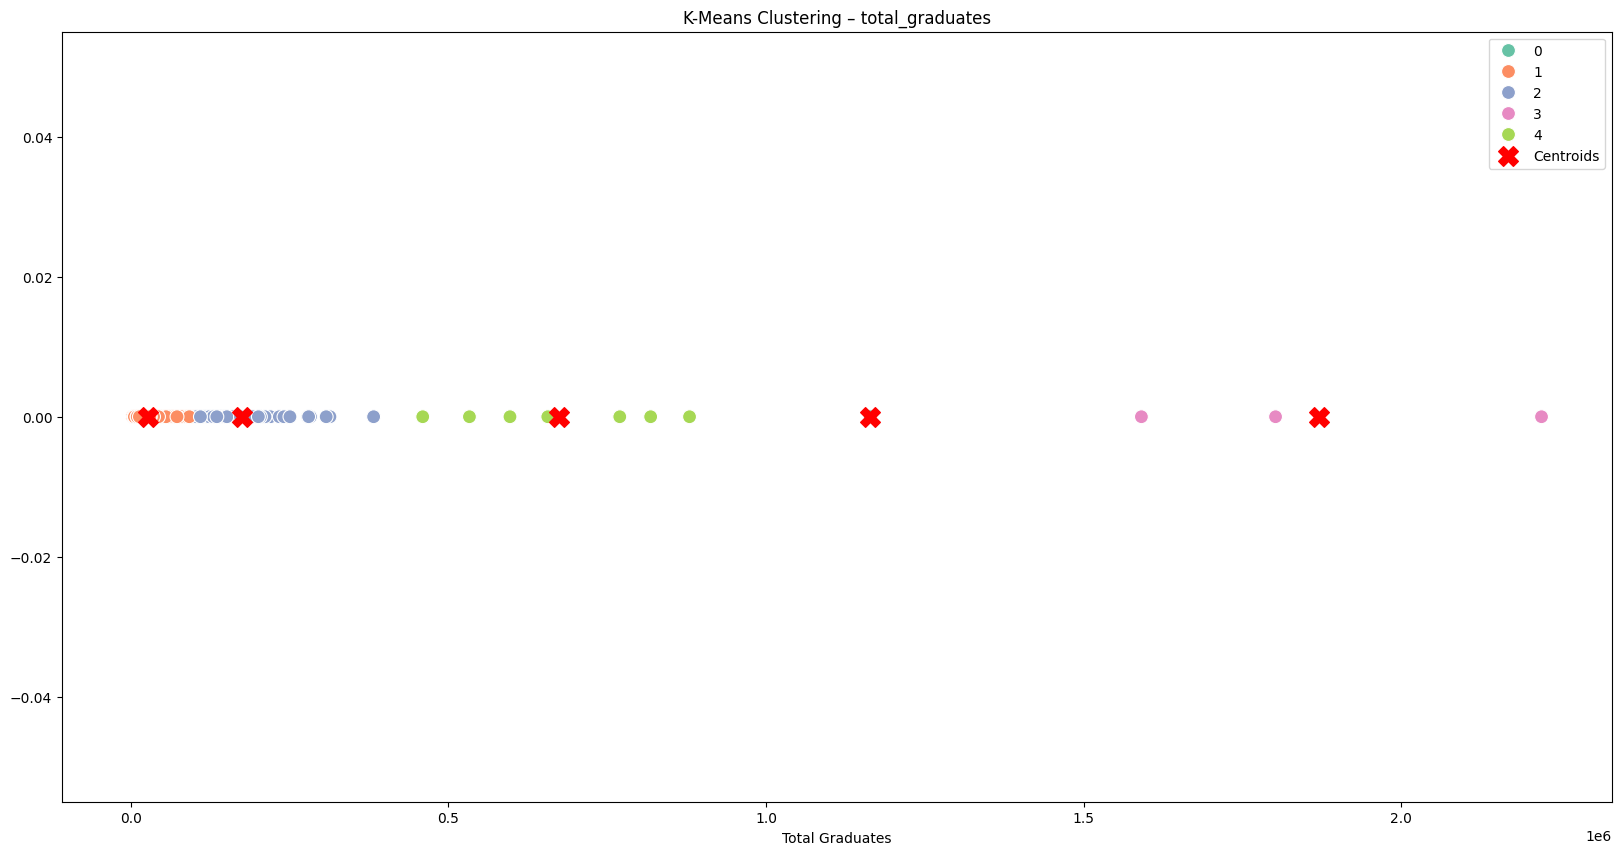

In [ ]:
# K-Means Clustering – Cities_r2.csv
# Feature: total_graduates

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# -----------------------------
# Load & Preprocess Dataset
# -----------------------------
df = pd.read_csv("cities_r2.csv")

# Encode categorical columns if necessary
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Select the feature for clustering
X = df[["total_graduates"]]

# -----------------------------
# Apply K-Means
# -----------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# -----------------------------
# Results
# -----------------------------
print("\nCluster Centers:")
print(kmeans.cluster_centers_)

print("\nClustered Data:")
print(df[["total_graduates", "Cluster"]].head())

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(20,10))
sns.scatterplot(x="total_graduates", y=[0]*len(df), hue="Cluster", data=df, palette="Set2", s=100)
plt.scatter(kmeans.cluster_centers_, [0]*len(kmeans.cluster_centers_), color="red", s=200, marker="X", label="Centroids")
plt.title("K-Means Clustering – total_graduates")
plt.xlabel("Total Graduates")
plt.legend()
plt.show()